<a href="https://colab.research.google.com/github/jorgegzz1609-collab/AI_IB/blob/main/PDI/Pr%C3%A1ctica_5_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 5.- Tipos de Traslaciones de Imágenes

Miembros:
* Jorge Alberto González Garza      - 2043501 - MieN5
* Castillo Díaz Ulises              - 2050354 - MieN5
* Muñoz Baca Axel                   - 2132103 - MieN5
* Rodríguez Arreguín Diego Eduardo  - 2004407 - MieN5



# Importaciones, cargas y definiciones previas:

In [1]:
# Importar librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
imagen = cv2.imread("/content/x-ray-hand.jpg", cv2.IMREAD_GRAYSCALE)

# Definir dimensiones de la imagen
alto, ancho = imagen.shape

# Ejercicio 1: Traslación Básica de Imagen

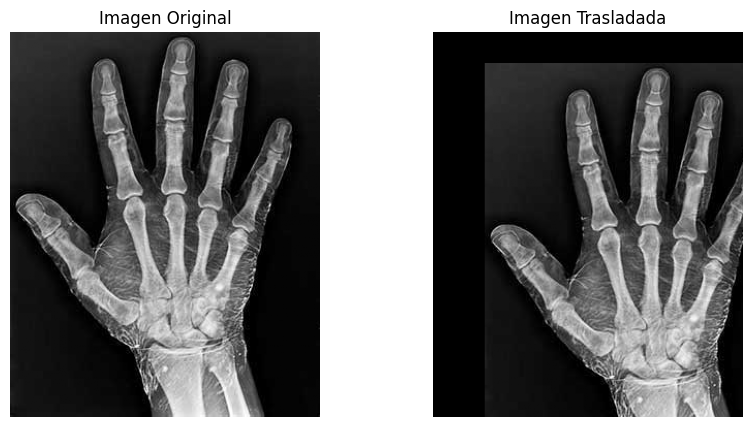

In [2]:
# Definir la matriz de traslación (50, 30 px)
tbx, tby = 50, 30  #Desplazamiento en X y Y
Tb = np.float32([[1, 0, tbx], [0, 1, tby]]) #Tb = traslación básica

# Aplicar la transformación afín
traslación_básica = cv2.warpAffine(imagen, Tb, (ancho, alto))

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(traslación_básica, cmap="gray")
plt.title("Imagen Trasladada")
plt.axis("off")

plt.show()

# Ejercicio 2: Traslación con Valores Decimales

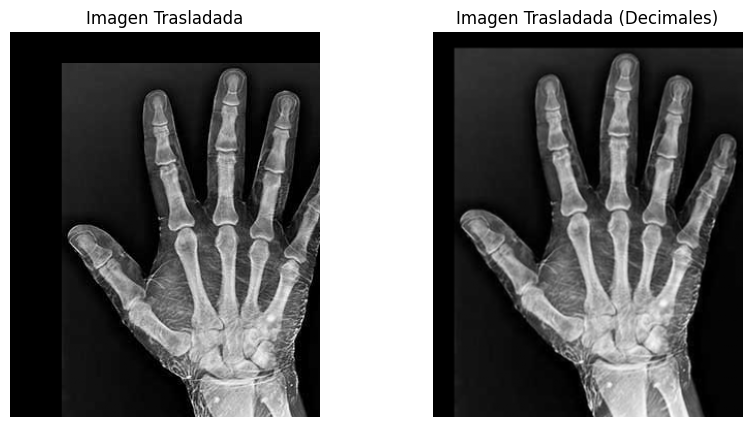

In [3]:
# Definir la matriz de traslación con valores decimales (20.5, 15.5)
tdx, tdy = 20.5, 15.5  #Desplazamiento en X y Y con decimales
Td = np.float32([[1, 0, tdx], [0, 1, tdy]]) #Td = Traslación con decimales

# Aplicar la traslación con interpolación
traslación_decimal = cv2.warpAffine(imagen, Td, (ancho, alto), flags=cv2.INTER_LINEAR)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(traslación_básica, cmap="gray")
plt.title("Imagen Trasladada")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(traslación_decimal, cmap="gray")
plt.title("Imagen Trasladada (Decimales)")
plt.axis("off")

plt.show()

# Ejercicio 3: Traslación + Rotación

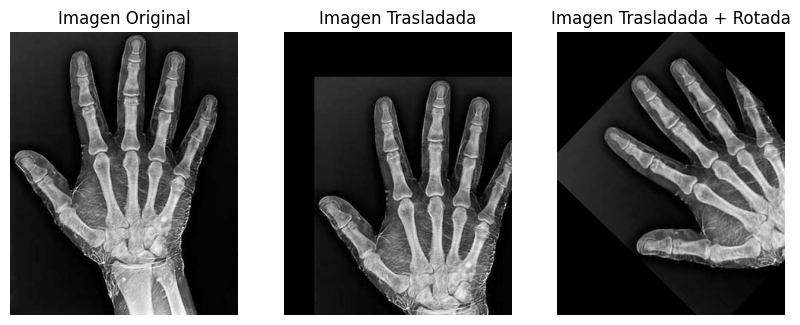

In [4]:
# Definir traslación
t3x, t3y = 40, 60
traslacion_3 = np.float32([[1, 0, t3x], [0, 1, t3y]])

# Aplicar traslación
imagen_trasladada_3 = cv2.warpAffine(imagen, traslacion_3, (ancho, alto))

# Definir rotación
angulo_3 = 46 #46° alrededor del centro de la imagen
centro_3 = (ancho // 2, alto // 2) #Centro de la imagen
escala_3 = 1.0 #Sin cambios en el tamaño
rotacion_3 = cv2.getRotationMatrix2D(centro_3, angulo_3, escala_3)

# Aplicar rotación sobre la imagen trasladada
imagen_final_3 = cv2.warpAffine(imagen_trasladada_3, rotacion_3, (ancho, alto))

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(imagen_trasladada_3, cmap="gray")
plt.title("Imagen Trasladada")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(imagen_final_3, cmap="gray")
plt.title("Imagen Trasladada + Rotada")
plt.axis("off")

plt.show()

# Ejercicio 4: Traslación + Rotación + Escalado

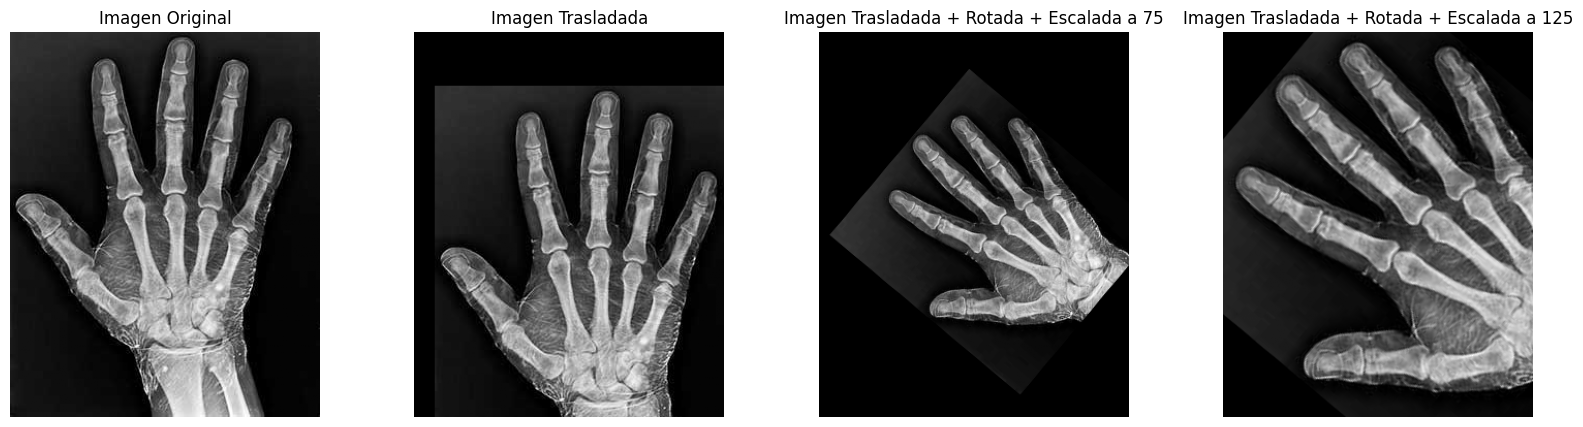

In [5]:
# Definir traslación
t4x, t4y = 20, 52
traslacion_4 = np.float32([[1, 0, t4x], [0, 1, t4y]])

# Aplicar traslación
imagen_trasladada_4 = cv2.warpAffine(imagen, traslacion_4, (ancho, alto))

# Definir rotación + escalado
centro_4 = (ancho // 2, alto // 2)
angulo_4 = 50
escala75_4 = 0.75 #Escala de 75%
escala125_4 = 1.25 #Escala de 125%

rotacion_escala75_4 = cv2.getRotationMatrix2D(centro_4, angulo_4, escala75_4)
rotacion_escala125_4 = cv2.getRotationMatrix2D(centro_4, angulo_4, escala125_4)

# Aplicar rotación y escalado
imagen_final75_4 = cv2.warpAffine(imagen_trasladada_4, rotacion_escala75_4, (ancho, alto))
imagen_final125_4 = cv2.warpAffine(imagen_trasladada_4, rotacion_escala125_4, (ancho, alto))

# Mostrar imágenes
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(imagen_trasladada_4, cmap="gray")
plt.title("Imagen Trasladada")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(imagen_final75_4, cmap="gray")
plt.title("Imagen Trasladada + Rotada + Escalada a 75")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(imagen_final125_4, cmap="gray")
plt.title("Imagen Trasladada + Rotada + Escalada a 125")
plt.axis("off")

plt.show()

# Ejercicio 5: Transformación Afín y Radial

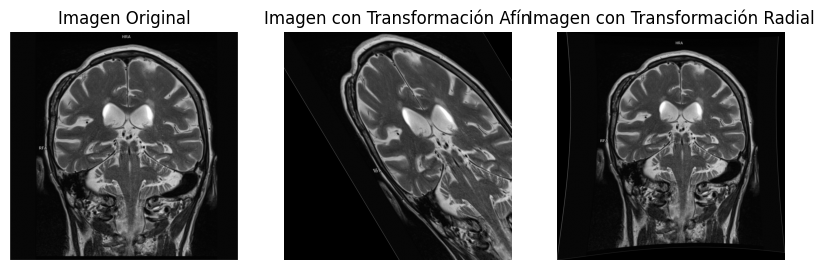

In [6]:
# Cargar la imagen en escala de grises
imagen2 = cv2.imread("/content/RMN_neurologico.jpg", cv2.IMREAD_GRAYSCALE)

# Definir puntos originales (antes de la transformación)
pts1 = np.float32([[50, 75], [200, 50], [50, 200]])

# Definir nuevos puntos transformados
pts2 = np.float32([[10, 100], [125, 50], [100, 250]])

# Obtener matriz de transformación afín
M5 = cv2.getAffineTransform(pts1, pts2)

# Aplicar transformación
filas, columnas = imagen2.shape
imagen_transformada_5 = cv2.warpAffine(imagen2, M5, (columnas, filas))

# Definir matriz de calibración de la cámara y coeficientes de distorsión
K = np.array([[1000, 0, 640], [0, 1000, 360], [0, 0, 1]]) #Matriz intrínseca
dist_coef = np.array([-0.2, 0.05, 0, 0, 0]) #Coeficientes de distorsión radial

# Corregir distorsión radial
h, w = imagen2.shape[:2]
new_K, roi = cv2.getOptimalNewCameraMatrix(K, dist_coef, (w, h), 1, (w, h))
imagen_corregida_5 = cv2.undistort(imagen2, K, dist_coef, None, new_K)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen2, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(imagen_transformada_5, cmap="gray")
plt.title("Imagen con Transformación Afín")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(imagen_corregida_5, cmap="gray")
plt.title("Imagen con Transformación Radial")
plt.axis("off")

plt.show()